In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)


In [7]:
x_train_scaled = X_train.copy()
x_train_scaled['age'] = x_train_scaled['age']/100
X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [8]:
x_train_scaled .head()

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1


In [9]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 320ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/5000
1/1

In [10]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 83ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497763752937317, 1.0]

In [11]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 39ms/step


array([[0.70548475],
       [0.3556957 ],
       [0.16827832],
       [0.4780119 ],
       [0.72606957],
       [0.82949823]], dtype=float32)

In [12]:
def sigmoid(x):
    import math
    return 1/(1+np.exp(-x))
coef , intercept = model.get_weights()
coef , intercept

(array([[5.0608625],
        [1.408652 ]], dtype=float32),
 array([-2.9137027], dtype=float32))

In [13]:
def prediction_function(age , affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility  + intercept 
    return sigmoid(weighted_sum)

In [14]:
prediction_function(-41 , 1)

C:\Users\Vulloju shabaresh\AppData\Local\Temp\ipykernel_26432\1253060610.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


array([0.], dtype=float32)

In [15]:
def logloss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new  = [max(i,epsilon) for i in  y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true * np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [16]:
def sigmoid_numpy(x):
    return 1/(1+np.exp(-x))
def gradient_descent(age ,affordibility,y_true,epochs):
    w1=w2=1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1*age +w2 *affordibility +bias
        y_predicted =sigmoid_numpy(weighted_sum)
        
        loss = logloss(y_true,y_predicted)
        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordibility),(y_predicted-y_true))
        bias_d = np.mean(y_predicted-y_true)
        
        w1 = w1 - rate * (w1d)
        w2 = w2 - rate * (w2d)
        bias = bias - rate*bias_d
        print(f'!Epoch : {i} , w1 : {w1} , w2 :{w2} , bias : {bias} ,loss : {loss}')

        
        
         

In [17]:
gradient_descent(x_train_scaled['age'],x_train_scaled['affordibility'],y_train,1000)

!Epoch : 0 , w1 : 0.974907633470177 , w2 :0.948348125394529 , bias : -0.11341867736368583 ,loss : 0.7113403233723417
!Epoch : 1 , w1 : 0.9556229728273669 , w2 :0.9058873696677865 , bias : -0.2122349122718517 ,loss : 0.681264778737757
!Epoch : 2 , w1 : 0.9416488476693794 , w2 :0.8719790823960313 , bias : -0.2977578997796538 ,loss : 0.6591474252715025
!Epoch : 3 , w1 : 0.9323916996249162 , w2 :0.8457541517722915 , bias : -0.3715094724003511 ,loss : 0.6431523291301917
!Epoch : 4 , w1 : 0.9272267472726993 , w2 :0.8262362885332687 , bias : -0.43506643026891584 ,loss : 0.6316873063379158
!Epoch : 5 , w1 : 0.9255469396815343 , w2 :0.8124402814952774 , bias : -0.48994490058938817 ,loss : 0.623471707997592
!Epoch : 6 , w1 : 0.9267936114129968 , w2 :0.8034375029757677 , bias : -0.5375299543522853 ,loss : 0.6175321183044205
!Epoch : 7 , w1 : 0.93047170420295 , w2 :0.7983920007454487 , bias : -0.5790424270894963 ,loss : 0.6131591858705934
!Epoch : 8 , w1 : 0.9361540784567942 , w2 :0.79657487967877

16714/16714 [==============================] - 8s 482us/step


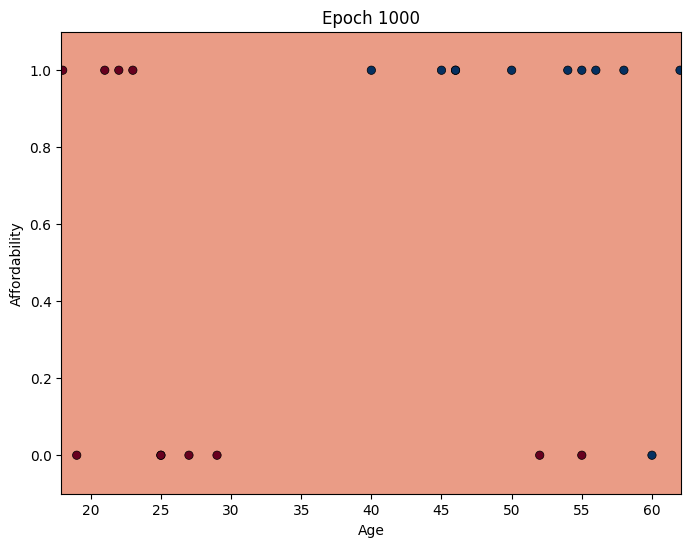

16714/16714 [==============================] - 8s 492us/step


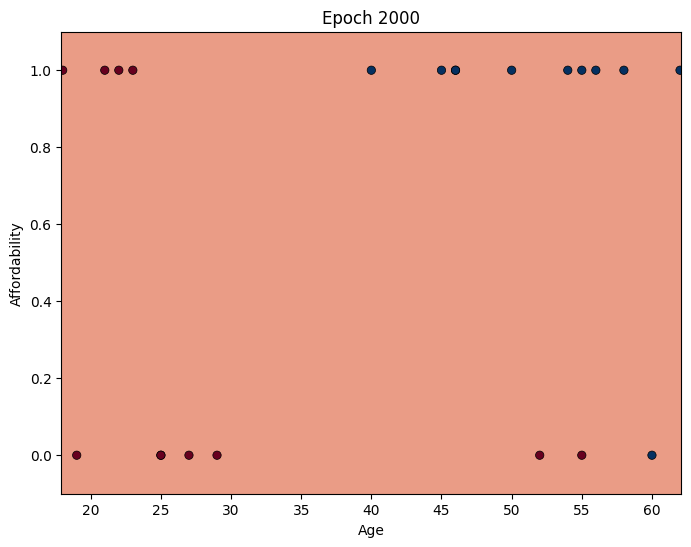

16714/16714 [==============================] - 8s 467us/step


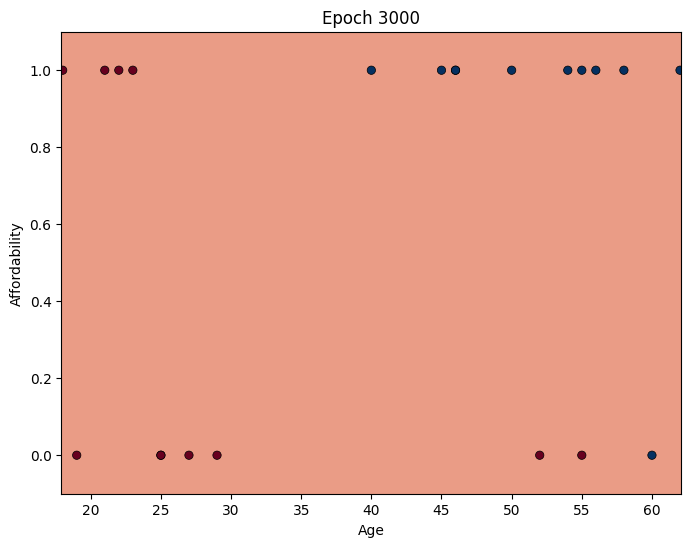

16714/16714 [==============================] - 8s 470us/step


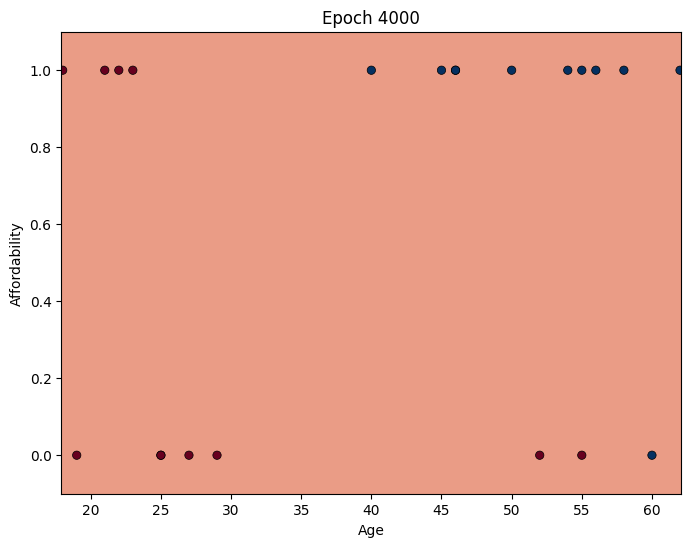

16714/16714 [==============================] - 8s 469us/step


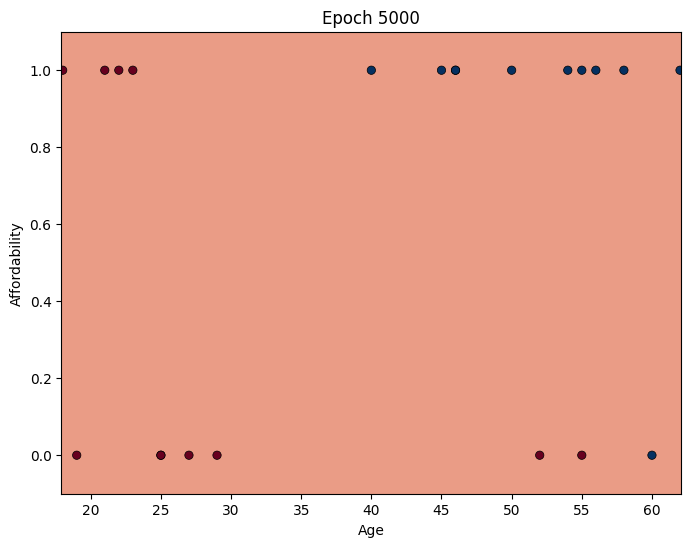

1/1 [==============================] - 0s 13ms/step - loss: 0.1863 - accuracy: 1.0000

Test Accuracy: 100.00%


In [19]:
from matplotlib import pyplot as plt
def plot_decision_boundary(X, y, model, epoch):
    plt.figure(figsize=(8, 6))
    
    # Plot decision boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    
    # Scatter plot of data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', marker='o', linewidth=0.5)
    
    plt.title(f'Epoch {epoch}')
    plt.xlabel('Age')
    plt.ylabel('Affordability')
    plt.show()

# Training and visualization loop
for epoch in range(1, 5001):
    model.fit(x_train_scaled, y_train, epochs=1, verbose=0)
    if epoch % 1000 == 0:
        plot_decision_boundary(X_train, y_train, model, epoch)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
